In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset in Python environment  

In [2]:
data=pd.read_csv(r"C:\Users\user\Downloads\train_loan.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
data.drop('Loan_ID',axis=1,inplace=True) #'Loan_ID' has 614 unique values(same as total number of rows), so dropping that feature

In [7]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Preprocessing steps

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# a. Missing value handling 

In [13]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
data.select_dtypes('number').skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [15]:
data.select_dtypes('object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [16]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [18]:
data.select_dtypes('number').nunique()

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [19]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [21]:
#since all numerical features are skewed, fill the missing values of numerical features except 'Credit_History' with median.
#since  'Credit_History' is binary, filling it with mode

In [22]:
skewed_cols = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term']

In [23]:
for col in skewed_cols:
    data[col].fillna(data[col].median(), inplace=True)

In [24]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [25]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
cat_cols_missing=['Gender','Married','Dependents','Self_Employed']#filling missing values of categorical features with mode

In [27]:
for col in cat_cols_missing:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [28]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(int) #convert 'Dependents' to numeric, treating '3+' as 3:

In [30]:
data.dtypes

Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# b. Outlier detection 

<Axes: >

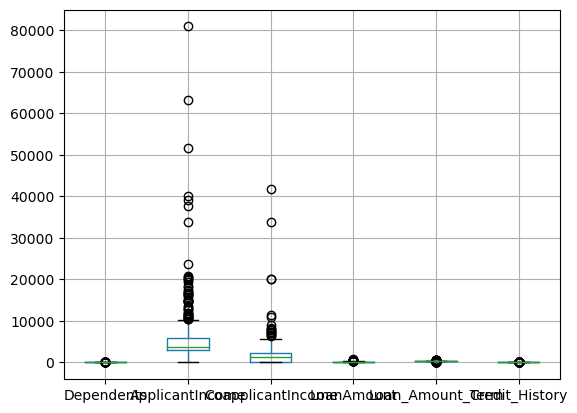

In [31]:
data.boxplot()

In [32]:
numeric_cols= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Dependents','Credit_History']

In [33]:
data.select_dtypes('number').nunique()

Dependents             4
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
dtype: int64

In [34]:
#since 'Dependents','Credit_History' have 4 and 2 unique values respectively, no need to remove outliers from those features

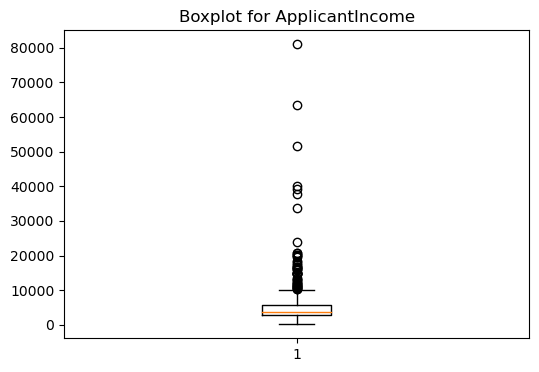

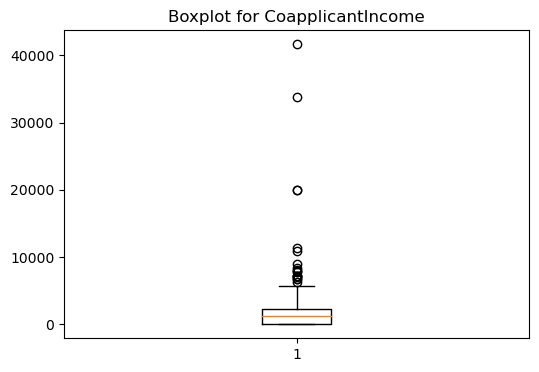

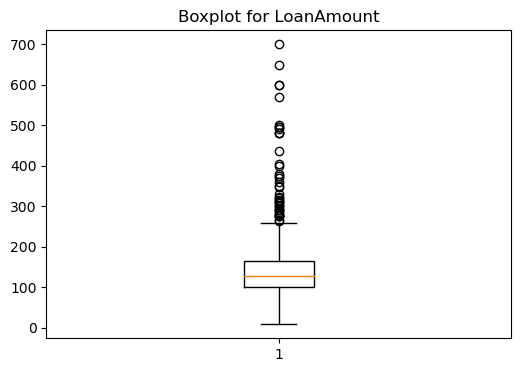

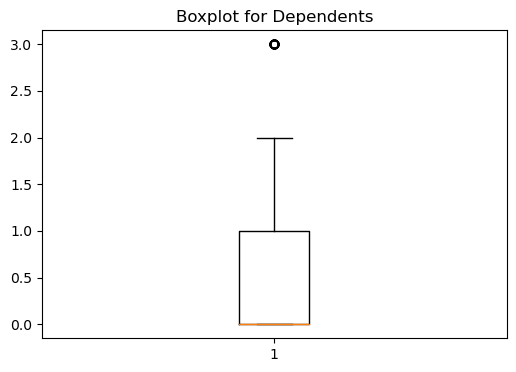

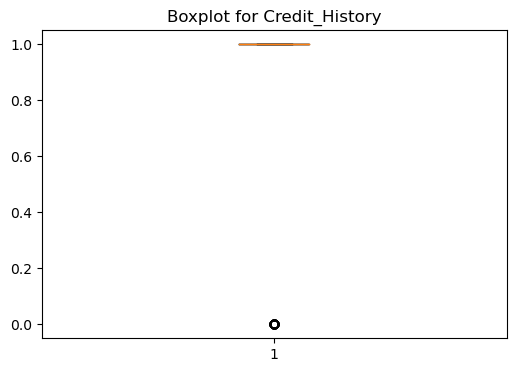

In [35]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(data[col])
    plt.title(f'Boxplot for {col}') 
    plt.show()

In [36]:
data.shape

(614, 12)

In [37]:
#using IQR method(log transformation can be done as they are genuine outliers. But after doing log transformation, no need to do scaling. In the question it's mentioned to do scaling, so I am using IQR method for handling outliers)
import pandas as pd

# List of columns where you want to remove outliers
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)   # 25th percentile
        Q3 = df[col].quantile(0.75)   # 75th percentile
        IQR = Q3 - Q1                 # Interquartile range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only values within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply function
data_filtered = remove_outliers_iqr(data, cols)

print("Shape before:", data.shape)
print("Shape after:", data_filtered.shape)


Shape before: (614, 12)
Shape after: (520, 12)


In [38]:
data_filtered.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

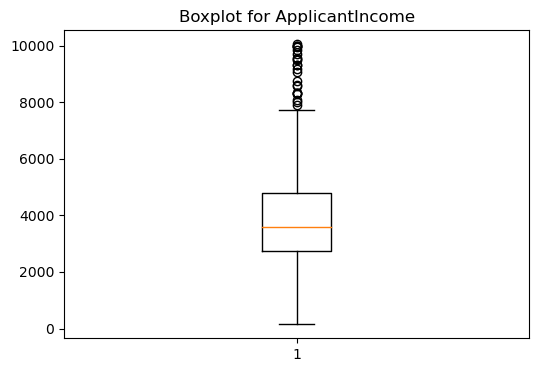

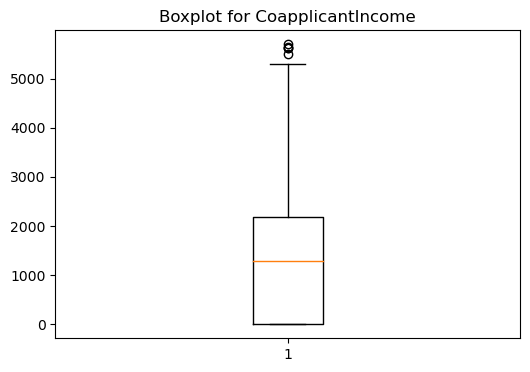

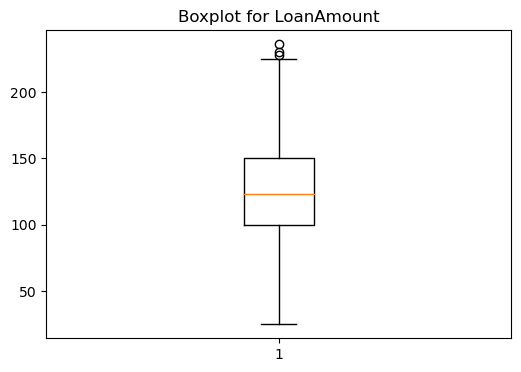

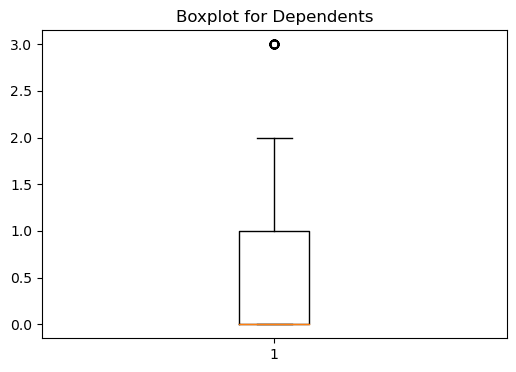

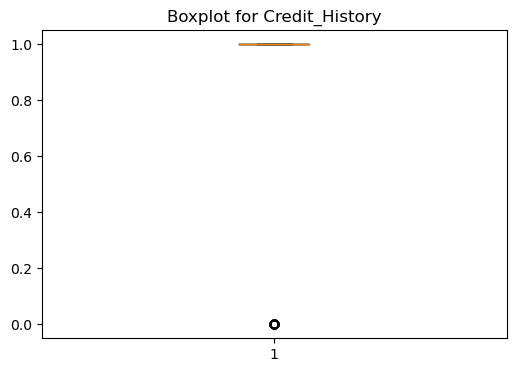

In [39]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(data_filtered[col])
    plt.title(f'Boxplot for {col}') 
    plt.show()

# c. Encoding 

In [40]:
data_filtered.select_dtypes('object').nunique()

Gender           2
Married          2
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

In [41]:
data_filtered.select_dtypes('object').value_counts()

Gender  Married  Education     Self_Employed  Property_Area  Loan_Status
Male    Yes      Graduate      No             Semiurban      Y              63
                                              Urban          Y              52
                                              Rural          Y              37
        No       Graduate      No             Urban          Y              18
        Yes      Graduate      No             Rural          N              18
                                                                            ..
        No       Graduate      Yes            Urban          N               1
                 Not Graduate  No             Semiurban      N               1
                               Yes            Urban          N               1
                                              Semiurban      Y               1
                 Graduate      Yes            Urban          Y               1
Length: 70, dtype: int64

In [42]:
# since all categorical features except 'Property_Area' are binary, we can use label encoding.
# we can use one hot encoding for 'Property_Area'.

# Label Encoding

In [43]:
categorical_columns =['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
     data_filtered[col] = le.fit_transform(data_filtered[col])

In [45]:
data_filtered.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# One Hot Encoding

In [46]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the encoder on the selected categorical columns
encoded_columns = encoder.fit_transform(data_filtered[['Property_Area']])

# Create a DataFrame from the encoded_columns array with column names, preserving the original index
encoded_data = pd.DataFrame(encoded_columns, 
                            columns=encoder.get_feature_names_out(['Property_Area']),
                            index=data_filtered.index)  # <-- preserve index

# Drop the original categorical columns from 'data_filtered'
data_filtered.drop('Property_Area', axis=1, inplace=True)

# Concatenate the original 'data_filtered' DataFrame with the encoded_data DataFrame
data_filtered = pd.concat([data_filtered, encoded_data], axis=1)

# Show the updated DataFrame
data_filtered


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0.0,1.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0.0,0.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0.0,1.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0.0,1.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,1,0.0,0.0
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,1,0.0,0.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,1,0.0,0.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,1,0.0,1.0


In [47]:
data_filtered.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

# d. Scaling 

In [48]:
#standard scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Create scaler instance
scaler = StandardScaler()

# Fit and transform the numerical columns
data_filtered[num_cols] = scaler.fit_transform(data_filtered[num_cols])

# Check scaled data
data_filtered.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,1.033643,-0.943785,0.109491,0.265776,1.0,1,0.0,1.0
1,1,1,1,0,0,0.327548,0.136399,0.109491,0.265776,1.0,0,0.0,0.0
2,1,1,0,0,1,-0.555349,-0.943785,-1.451763,0.265776,1.0,1,0.0,1.0
3,1,1,0,1,0,-0.787925,0.745256,-0.091961,0.265776,1.0,1,0.0,1.0
4,1,0,0,0,0,1.117861,-0.943785,0.436851,0.265776,1.0,1,0.0,1.0


In [50]:
data_filtered.shape

(520, 13)